In [264]:
# setting environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset
The data set I chose for this project is from [Web Robots](https://webrobots.io/kickstarter-datasets/), **KickStarter** is the world's largest funding platform for creative projects. The dataset consists of all the projects campaign in a certain period, the goal for this challenge is to explore the data and create new features that could potentially be helpful in our next mission: to predict the project is successfully funded or not

In [265]:
# read the csv file and check the first few rows
KS_raw = pd.read_csv('data/Kickstarter.csv')
KS_raw.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,170,A documentary about two circuses in remote cor...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",27455,US,1339525842,"{""id"":1596438170,""name"":""Susan Gray"",""is_regis...",USD,$,True,...,big-top-without-borders,https://www.kickstarter.com/discover/categorie...,True,False,successful,1353256231,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",27455.55,international
1,10,A multi-media IPad book telling the true story...,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",535,US,1351941026,"{""id"":529454320,""name"":""Barb Buresh"",""is_regis...",USD,$,True,...,the-story-of-pweep-from-egg-to-peacock,https://www.kickstarter.com/discover/categorie...,True,False,successful,1355949546,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",535.00,international
2,0,We are college students that get drunk and the...,"{""id"":357,""name"":""Audio"",""slug"":""journalism/au...",0,CA,1415917256,"{""id"":1626740608,""name"":""DC Radio"",""is_registe...",CAD,$,True,...,dc-radio,https://www.kickstarter.com/discover/categorie...,False,False,failed,1418916015,0.886698,"{""web"":{""project"":""https://www.kickstarter.com...",0.00,domestic
3,0,"its Ali bangerz,its time to stand up for other...","{""id"":44,""name"":""World Music"",""slug"":""music/wo...",0,US,1446664703,"{""id"":631293879,""name"":""Ali Bangerz"",""is_regis...",USD,$,True,...,ali-bangerz-two-new-full-lenght-albums,https://www.kickstarter.com/discover/categorie...,False,False,failed,1449345000,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.00,domestic
4,62,A young neuroscientist attempts to reconnect w...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",6705,US,1284003536,"{""id"":1385040366,""name"":""Alexis Gambis (delete...",USD,$,True,...,deja-vu-dissecting-memory-on-camera,https://www.kickstarter.com/discover/categorie...,True,True,successful,1287200724,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",6705.00,international


In [266]:
# check the composition of each column, drop the column that has mostly NaN(more than half)
print(KS_raw.info())
KS_clean = KS_raw.dropna(thresh=len(KS_raw)/2, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 37 columns):
backers_count               3811 non-null int64
blurb                       3810 non-null object
category                    3811 non-null object
converted_pledged_amount    3811 non-null int64
country                     3811 non-null object
created_at                  3811 non-null int64
creator                     3811 non-null object
currency                    3811 non-null object
currency_symbol             3811 non-null object
currency_trailing_code      3811 non-null bool
current_currency            3811 non-null object
deadline                    3811 non-null int64
disable_communication       3811 non-null bool
friends                     2 non-null object
fx_rate                     3811 non-null float64
goal                        3811 non-null float64
id                          3811 non-null int64
is_backing                  2 non-null object
is_starrable            

In [267]:
KS_clean.iloc[0]['profile']

'{"id":223806,"project_id":223806,"state":"inactive","state_changed_at":1425915812,"name":null,"blurb":null,"background_color":null,"text_color":null,"link_background_color":null,"link_text_color":null,"link_text":null,"link_url":null,"show_feature_image":false,"background_image_opacity":0.8,"should_show_feature_image_section":true,"feature_image_attributes":{"image_urls":{"default":"https://ksr-ugc.imgix.net/assets/011/379/855/ece09cf50132944b2c72ea5d07a8cd96_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463681787&auto=format&frame=1&q=92&s=88c1cbd723d8a648fb647adf311c6e1d","baseball_card":"https://ksr-ugc.imgix.net/assets/011/379/855/ece09cf50132944b2c72ea5d07a8cd96_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463681787&auto=format&frame=1&q=92&s=f8b7ea008d3d61b710f2aefc811b79d7"}}}'

In [268]:
# check the first row to see what it contains in each column to get an idea what might be useful
KS_clean.iloc[0]

backers_count                                                             170
blurb                       A documentary about two circuses in remote cor...
category                    {"id":30,"name":"Documentary","slug":"film & v...
converted_pledged_amount                                                27455
country                                                                    US
created_at                                                         1339525842
creator                     {"id":1596438170,"name":"Susan Gray","is_regis...
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                           1353256229
disable_communication                                           

from above, we could see that columns like `blurb` are for description purpose, which does not have any value for our prediction purpose, thus we could savely remove it. Others like `id` is assigned by **Kickstarter** is not useful either, `name`, `photo`, `source_url`, `urls`..etc. are more or less for identity purpose, time related columns like `created at`, `deadline`...etc. have no use either, since the format is too unique and does not provide useful information, we could remove them as well, we will perform the columns cleaning step.

In [269]:
# drop unnecessary columns
col_drop = ['blurb', 'created_at', 'creator', 'currency_symbol', 'deadline', 'id', 'launched_at', 'name', 'photo',
           'profile', 'slug', 'source_url', 'state_changed_at', 'urls']
KS_clean.drop(col_drop, axis=1, inplace=True)

In [270]:
KS_clean.head()

,backers_count,category,converted_pledged_amount,country,currency,currency_trailing_code,current_currency,disable_communication,fx_rate,goal,is_starrable,location,pledged,spotlight,staff_pick,state,static_usd_rate,usd_pledged,usd_type
0,170,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",27455,US,USD,True,USD,False,1.000000,25000.0,False,"{""id"":2367105,""name"":""Boston"",""slug"":""boston-m...",27455.55,True,False,successful,1.000000,27455.55,international
1,10,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",535,US,USD,True,USD,False,1.000000,500.0,False,"{""id"":2466256,""name"":""Orlando"",""slug"":""orlando...",535.00,True,False,successful,1.000000,535.00,international
2,0,"{""id"":357,""name"":""Audio"",""slug"":""journalism/au...",0,CA,CAD,True,USD,False,0.748587,3500.0,False,"{""id"":4118,""name"":""Toronto"",""slug"":""toronto-on...",0.00,False,False,failed,0.886698,0.00,domestic
3,0,"{""id"":44,""name"":""World Music"",""slug"":""music/wo...",0,US,USD,True,USD,False,1.000000,20000.0,False,"{""id"":2466256,""name"":""Orlando"",""slug"":""orlando...",0.00,False,False,failed,1.000000,0.00,domestic
4,62,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",6705,US,USD,True,USD,False,1.000000,5000.0,False,"{""id"":12589335,""name"":""Brooklyn"",""slug"":""brook...",6705.00,True,True,successful,1.000000,6705.00,international


Next, we can see there are some columns that have dictionary format, for example, `category` and `location`, we will examine those columns to examine further to see if we could extract any useful information for our model

In [271]:
# check the category column
KS_clean.iloc[1]['category']

'{"id":46,"name":"Children\'s Books","slug":"publishing/children\'s books","position":5,"parent_id":18,"color":14867664,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/publishing/children\'s%20books"}}}'

In [272]:
KS_clean.iloc[0]['category']

'{"id":30,"name":"Documentary","slug":"film & video/documentary","position":4,"parent_id":11,"color":16734574,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/film%20&%20video/documentary"}}}'

In [273]:
KS_clean.iloc[10]['category']

'{"id":270,"name":"Gaming Hardware","slug":"games/gaming hardware","position":1,"parent_id":12,"color":51627,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/games/gaming%20hardware"}}}'

From above, we could tell that the `name` and `color` information in the category column might be useful

In [274]:
# extract the name information from category column and replace the original column
KS_clean['name'] = KS_clean['category'].str.extract('"name":"(.*)","slug"')
KS_clean['color'] = KS_clean['category'].str.extract('"color":(.*),"urls"')

In [275]:
# check the compositions in new column
KS_clean['name'].value_counts()

Shorts                250
Documentary           244
Hip-Hop               242
Children's Books      238
Video Games           227
World Music           164
Web                   153
Performances          141
Farms                 137
People                122
Musical               121
Conceptual Art        120
Live Games            100
Television             98
Young Adult            90
Action                 80
Graphic Design         64
Hardware               57
Gaming Hardware        54
Audio                  52
Public Art             47
Comedy                 44
Interactive Design     44
Performance Art        44
Fiction                37
Country & Folk         36
Small Batch            35
Spaces                 32
Couture                30
Woodworking            30
                     ... 
Kids                    7
Embroidery              7
Childrenswear           6
Technology              6
Installations           6
Events                  6
Pottery                 5
Painting    

In [276]:
KS_clean['color'].value_counts()

16734574    743
10878931    475
14867664    473
51627       434
16760235    262
16725570    240
1228010     216
10917369    194
58341       188
16743775    150
2577151     141
6526716     131
16752598     85
16744876     79
Name: color, dtype: int64

We can tell there are 92 unique categories, some of them only has less than ten of nearly 4000 projects, we will use 30 as a cutoff value and assign those categories that have less than 30 projects as `Minor_cat`

In [277]:
KS_cat = KS_clean['name'].value_counts()
KS_cat[KS_cat < 30].index

Index(['Photobooks', 'Wearables', 'Romance', 'Drinks', 'Tabletop Games', 'DIY',
       'Playing Cards', 'Restaurants', 'Dance', 'Ready-to-wear', 'Apparel',
       'Radio & Podcasts', 'Apps', 'Periodicals', 'Academic', 'Digital Art',
       'Product Design', 'Translations', 'Poetry', 'Art', 'Video', 'R&B',
       'Thrillers', 'Experimental', 'Literary Journals', 'Mixed Media',
       'Architecture', 'Metal', 'Fabrication Tools', 'Fine Art',
       'Farmer's Markets', 'Kids', 'Embroidery', 'Childrenswear', 'Technology',
       'Installations', 'Events', 'Pottery', 'Painting', 'Literary Spaces',
       'Crochet', 'Knitting', 'Makerspaces', 'Design', 'Workshops', 'Gadgets',
       'Festivals', 'Quilts', 'Immersive', 'Chiptune', 'Software', 'Bacon',
       'Vegan', 'Camera Equipment', 'Residencies', 'Illustration',
       'Typography', 'Pet Fashion', '3D Printing', 'Robots', 'Civic Design'],
      dtype='object')

In [278]:
# transform data
# define helper function cat
def cat(col):
    if col in KS_cat[KS_cat < 30].index:
        return 'Minor_cat'
    else:
        return col
cat_v = np.vectorize(cat)
KS_clean['name'] = cat_v(KS_clean['name'])

In [279]:
# check the result
KS_clean['name'].value_counts()

Minor_cat             648
Shorts                250
Documentary           244
Hip-Hop               242
Children's Books      238
Video Games           227
World Music           164
Web                   153
Performances          141
Farms                 137
People                122
Musical               121
Conceptual Art        120
Live Games            100
Television             98
Young Adult            90
Action                 80
Graphic Design         64
Hardware               57
Gaming Hardware        54
Audio                  52
Public Art             47
Interactive Design     44
Comedy                 44
Performance Art        44
Fiction                37
Country & Folk         36
Small Batch            35
Spaces                 32
Animals                30
Couture                30
Woodworking            30
Name: name, dtype: int64

In [280]:
# drop the original category column
KS_clean.drop(['category'], axis=1, inplace=True)

Now we check the location column to see if there is any useful information

In [281]:
# check the location column
KS_clean.iloc[1]['location']

'{"id":2466256,"name":"Orlando","slug":"orlando-fl","short_name":"Orlando, FL","displayable_name":"Orlando, FL","localized_name":"Orlando","country":"US","state":"FL","type":"Town","is_root":false,"urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/orlando-fl","location":"https://www.kickstarter.com/locations/orlando-fl"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1544744108.d051032d270dd1093d42b7aa19a14d5fbdc44d3d&woe_id=2466256"}}}'

To simplify the problem, we extract only the country part so there are not too many unique values but still have enough categories for our model

In [282]:
# extract the contry code from the location column as replace the original column
KS_clean['location'] = KS_clean['location'].str.extract('"country":"(.*)","state"')

In [283]:
# check the value of location
KS_clean['location'].value_counts().head(5)

US    2828
GB     284
CA     149
AU      75
DE      49
Name: location, dtype: int64

From above, we can see the top 5=five contries of origin are `US`, `GB`, `CA`, `AU`, `DE`, we will create a sixth category called others if it is not in these five countries, in other words, we will transform `location` column into a six-value categorical feature

In [284]:
KS_clean['location'] = np.where(KS_clean['location'] == 'US', 'US',
                     np.where(KS_clean['location'] == 'GB', 'GB',
                     np.where(KS_clean['location'] == 'CA', 'CA',
                     np.where(KS_clean['location'] == 'AU', 'AU',
                     np.where(KS_clean['location'] == 'DE', 'DE', 'Others')))))
KS_clean['location'].value_counts()

US        2828
Others     426
GB         284
CA         149
AU          75
DE          49
Name: location, dtype: int64

In [285]:
KS_clean.head(10)

,backers_count,converted_pledged_amount,country,currency,currency_trailing_code,current_currency,disable_communication,fx_rate,goal,is_starrable,location,pledged,spotlight,staff_pick,state,static_usd_rate,usd_pledged,usd_type,name,color
0,170,27455,US,USD,True,USD,False,1.000000,25000.0,False,US,27455.55,True,False,successful,1.000000,27455.550000,international,Documentary,16734574
1,10,535,US,USD,True,USD,False,1.000000,500.0,False,US,535.00,True,False,successful,1.000000,535.000000,international,Children's Books,14867664
2,0,0,CA,CAD,True,USD,False,0.748587,3500.0,False,CA,0.00,False,False,failed,0.886698,0.000000,domestic,Audio,1228010
3,0,0,US,USD,True,USD,False,1.000000,20000.0,False,US,0.00,False,False,failed,1.000000,0.000000,domestic,World Music,10878931
4,62,6705,US,USD,True,USD,False,1.000000,5000.0,False,US,6705.00,True,True,successful,1.000000,6705.000000,international,Documentary,16734574
5,0,0,MX,MXN,True,USD,False,0.049716,20000.0,False,Others,0.00,False,False,failed,0.052852,0.000000,international,Comedy,16743775
6,1,1,US,USD,True,USD,False,1.000000,350.0,False,US,1.00,False,False,failed,1.000000,1.000000,domestic,Action,16734574
7,1,100,US,USD,True,USD,False,1.000000,10000.0,False,US,100.00,False,False,failed,1.000000,100.000000,domestic,World Music,10878931
8,5,700,US,USD,True,USD,False,1.000000,700.0,False,US,700.00,True,False,successful,1.000000,700.000000,international,Musical,16743775
9,2,136,CA,CAD,True,USD,False,0.748587,50000.0,False,CA,170.00,False,False,failed,0.788605,134.062845,international,Couture,16752598


Next, we will deal with numerical values, it seems that `converted_pledged_amount`, `pledged` and `usd_pledged`column are referring the same thing, we would keep the `usd_pledged` column only since we want to have the same currency to compare between projects. Since we only care about the pledged amount, the currency exchange rate does not matter as well as the currency type, we will drop those columns accordingly.

In [286]:
# drop the column
col_drop = ['converted_pledged_amount', 'currency', 'currency_trailing_code', 'current_currency', 'fx_rate', 
            'pledged', 'static_usd_rate']
KS_clean.drop(col_drop, axis=1, inplace=True)

Next we will deal with the categorical variable and change the binary value to 0 and 1, for example, in our target value column `state`, we would like to predict whether the project is successful or not, so we will assign successful as 1 and other values 0

In [287]:
# transform the binary categorical column
KS_clean['disable_communication'] = KS_clean['disable_communication'].map({False: 0, True: 1})
KS_clean['is_starrable'] = KS_clean['is_starrable'].map({False: 0, True: 1})
KS_clean['spotlight'] = KS_clean['spotlight'].map({False: 0, True: 1})
KS_clean['staff_pick'] = KS_clean['staff_pick'].map({False: 0, True: 1})

In [288]:
# deal with the state column
KS_clean['state'] = np.where(KS_clean['state'] == 'successful', 1, 0)

In [289]:
KS_clean.head()

,backers_count,country,disable_communication,goal,is_starrable,location,spotlight,staff_pick,state,usd_pledged,usd_type,name,color
0,170,US,0,25000.0,0,US,1,0,1,27455.55,international,Documentary,16734574
1,10,US,0,500.0,0,US,1,0,1,535.00,international,Children's Books,14867664
2,0,CA,0,3500.0,0,CA,0,0,0,0.00,domestic,Audio,1228010
3,0,US,0,20000.0,0,US,0,0,0,0.00,domestic,World Music,10878931
4,62,US,0,5000.0,0,US,1,1,1,6705.00,international,Documentary,16734574


It looks like `country` column is pretty much the same as `location`, we will drop the `country` column since we already extract those information from the `location` column, we will drop `usd_type` as well because it does not provide any useful information

In [290]:
# drop more column
KS_clean.drop(['country', 'usd_type'], axis=1, inplace=True)

In [291]:
KS_clean.corr()

,backers_count,disable_communication,goal,is_starrable,spotlight,staff_pick,state,usd_pledged
backers_count,1.000000,-0.010545,0.024467,-0.008481,0.157133,0.231127,0.157133,0.844844
disable_communication,-0.010545,1.000000,0.022214,-0.009029,-0.074039,-0.028517,-0.074039,-0.009620
goal,0.024467,0.022214,1.000000,-0.003878,-0.051370,-0.012811,-0.051370,0.030138
is_starrable,-0.008481,-0.009029,-0.003878,1.000000,-0.126720,-0.036207,-0.126720,-0.010733
spotlight,0.157133,-0.074039,-0.051370,-0.126720,1.000000,0.291046,1.000000,0.146564
staff_pick,0.231127,-0.028517,-0.012811,-0.036207,0.291046,1.000000,0.291046,0.190288
state,0.157133,-0.074039,-0.051370,-0.126720,1.000000,0.291046,1.000000,0.146564
usd_pledged,0.844844,-0.009620,0.030138,-0.010733,0.146564,0.190288,0.146564,1.000000


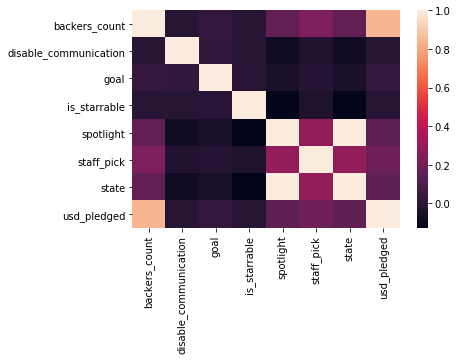

In [292]:
sns.heatmap(KS_clean.corr())

From above, we could tell that `spotlight` and our target column `state` has correlation coefficient 1, which means `spotlight` is redundant, we will remove it

In [293]:
# remove spotlight column
KS_clean.drop(['spotlight'], axis=1, inplace=True)

In [294]:
KS_clean['location'].value_counts()

US        2828
Others     426
GB         284
CA         149
AU          75
DE          49
Name: location, dtype: int64

Now it's time to deal with our categorical variable, in this case we will transform them into dummy column for each category

In [295]:
# create dummy variables for category and column
dummy_cat = pd.get_dummies(KS_clean[['name', 'color', 'location']])

# concatanate dummy variables to the original dataset
KS_clean = pd.concat([KS_clean, dummy_cat], axis=1)

# drop the original column
KS_clean.drop(['name', 'color', 'location'], axis=1, inplace=True)

In [296]:
KS_clean.head()

,backers_count,disable_communication,goal,is_starrable,staff_pick,state,usd_pledged,name_Action,name_Animals,name_Audio,...,color_2577151,color_51627,color_58341,color_6526716,location_AU,location_CA,location_DE,location_GB,location_Others,location_US
0,170,0,25000.0,0,0,1,27455.55,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,0,500.0,0,0,1,535.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,3500.0,0,0,0,0.00,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,20000.0,0,0,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,62,0,5000.0,0,1,1,6705.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [297]:
# check the result
KS_clean.shape

(3811, 59)

In our last step, we will check the NaN value again in each column, since the model we will perform in the future can not handle NaN

In [298]:
KS_clean.isnull().sum()

backers_count              0
disable_communication      0
goal                       0
is_starrable               0
staff_pick                 0
state                      0
usd_pledged                0
name_Action                0
name_Animals               0
name_Audio                 0
name_Children's Books      0
name_Comedy                0
name_Conceptual Art        0
name_Country & Folk        0
name_Couture               0
name_Documentary           0
name_Farms                 0
name_Fiction               0
name_Gaming Hardware       0
name_Graphic Design        0
name_Hardware              0
name_Hip-Hop               0
name_Interactive Design    0
name_Live Games            0
name_Minor_cat             0
name_Musical               0
name_People                0
name_Performance Art       0
name_Performances          0
name_Public Art            0
name_Shorts                0
name_Small Batch           0
name_Spaces                0
name_Television            0
name_Video Gam

Looks like there is no NaN value exist in any column, we are finished with the feature selection and feature engineering, the next step will be fitting our model for prediction

In [299]:
# export csv file for further use
KS_clean.to_csv('data/KS_clean.csv', index=False)

In [ ]:
PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired (feature 1 is only correlated with feature 2, feature 3 is only correlated with feature 4, etc)